In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/xor.csv')

In [ ]:
print(df)

   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0


In [ ]:
x = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()

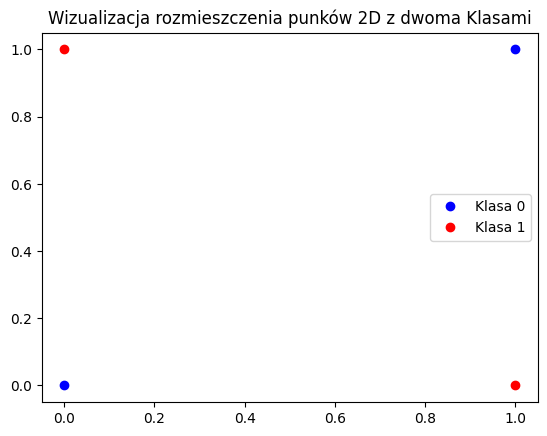

In [ ]:
plt.plot(x[y == 0][:, 0], x[y == 0][:, 1], 'bo', label='Klasa 0')
plt.plot(x[y == 1][:, 0], x[y == 1][:, 1], 'ro', label='Klasa 1')
plt.legend()
plt.title('Wizualizacja rozmieszczenia punków 2D z dwoma Klasami')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [ ]:
model = Sequential([ #stworzeenie modelu
    Dense(2, activation='sigmoid', input_dim = 2, name='first'),
    Dense(1, activation='sigmoid', name='second')
])

In [ ]:
model.compile(optimizer=SGD(learning_rate=1e-1), loss ='mse',
              metrics=['accuracy'])

In [ ]:
pred = np.round(model.predict(x).flatten()) #przed treningiem

for i in range(len(x)):
    print(x[i], y[i], pred[i])

1/1 [==============================] - 1s 859ms/step
[0 0] 0 1.0
[0 1] 1 1.0
[1 0] 1 1.0
[1 1] 0 1.0


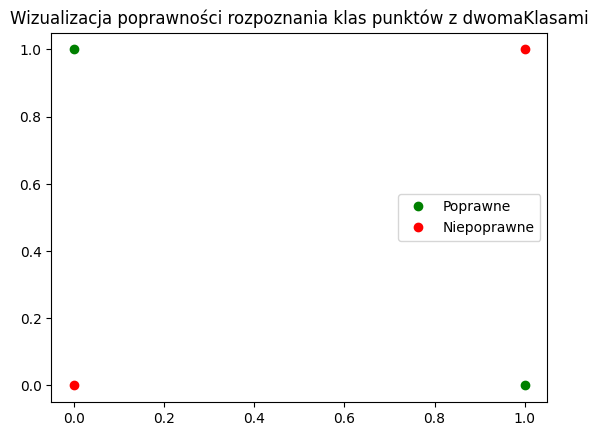

In [ ]:
plt.plot(x[y == pred][:, 0], x[y == pred][:, 1], 'go',
label='Poprawne')
plt.plot(x[y != pred][:, 0], x[y != pred][:, 1], 'ro',
label='Niepoprawne')
plt.legend()
plt.title('Wizualizacja poprawności rozpoznania klas punktów z dwomaKlasami')
plt.show()

In [ ]:
history = model.fit(x, y, epochs=5000, batch_size=1, verbose=0) # trening

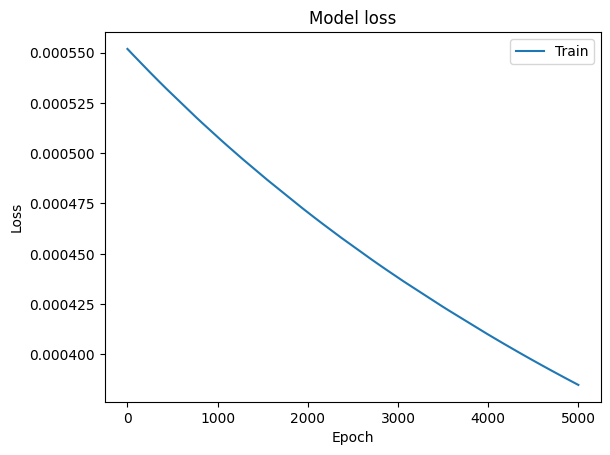

In [ ]:
plt.plot(history.history['loss']) #funkcja straty po treningu
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

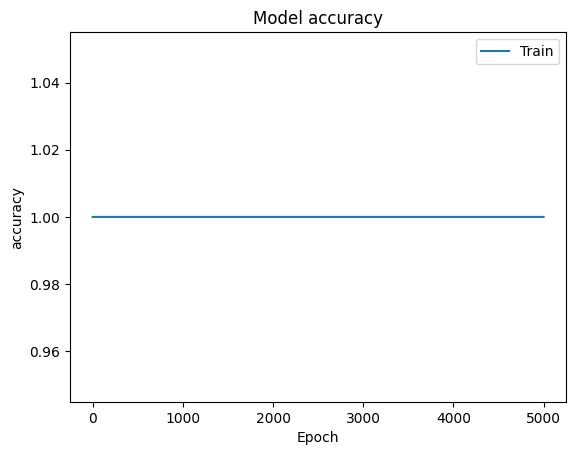

In [ ]:
plt.plot(history.history['accuracy']) #dokładność po treningu
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [ ]:
pred = np.round(model.predict(x).flatten())

for i in range(len(x)):
    print(x[i], y[i], pred[i])

1/1 [==============================] - 0s 28ms/step
[0 0] 0 0.0
[0 1] 1 1.0
[1 0] 1 1.0
[1 1] 0 0.0


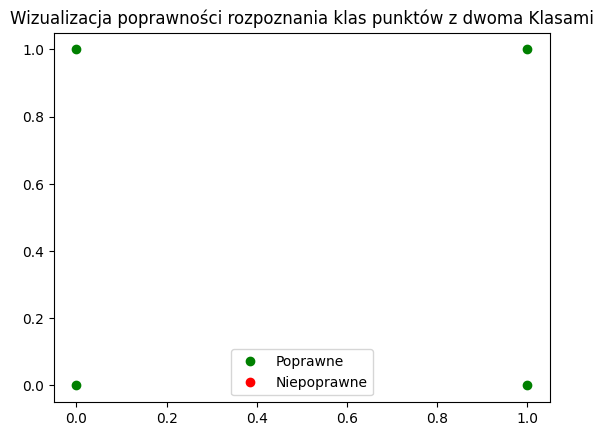

In [ ]:
plt.plot(x[y == pred][:, 0], x[y == pred][:, 1], 'go',
label='Poprawne')
plt.plot(x[y != pred][:, 0], x[y != pred][:, 1], 'ro',
label='Niepoprawne')
plt.legend()
plt.title('Wizualizacja poprawności rozpoznania klas punktów z dwoma Klasami')
plt.show()